# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent



In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_DA_I = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_I = df_DA_I.dropna(subset=['salary_year_avg'])

df_DA_I_exploded = df_DA_I.explode('job_skills')

df_DA_I_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [32]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_I_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_I)  # Find count of Data Analyst jobs in India with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 6

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] >= skill_percent]

df_DA_skills_high_demand = df_DA_skills_high_demand.drop('mongodb',errors = 'Ignore')  # Removing mongodb as it is an outlier

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [54]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['tableau',
  'ms access',
  'msaccess',
  'dax',
  'sap',
  'ssis',
  'looker',
  'excel',
  'datarobot',
  'cognos',
  'spss',
  'qlik',
  'visio',
  'sheets',
  'alteryx',
  'powerbi',
  'outlook',
  'sharepoint',
  'esquisse',
  'ssrs',
  'splunk',
  'powerpoint',
  'nuix',
  'power bi',
  'spreadsheet',
  'microstrategy',
  'sas',
  'word'],
 'programming': ['shell',
  'erlang',
  'elixir',
  'delphi',
  'cobol',
  'java',
  'nosql',
  'visualbasic',
  'mongo',
  'assembly',
  'lisp',
  'f#',
  'ocaml',
  'julia',
  'ruby',
  't-sql',
  'rust',
  'powershell',
  'clojure',
  'javascript',
  'crystal',
  'c++',
  'vba',
  'sass',
  'pascal',
  'r',
  'apl',
  'bash',
  'kotlin',
  'c',
  'golang',
  'html',
  'php',
  'matlab',
  'haskell',
  'perl',
  'solidity',
  'swift',
  'objective-c',
  'groovy',
  'c#',
  'python',
  'lua',
  'dart',
  'visual basic',
  'typescript',
  'css',
  'sas',
  'go',
  'mongodb',
  'scala',
  'no-sql',
  'sql',
  'fortran',
  'vb.

In [55]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology


,technology,skills
0,analyst_tools,tableau
0,analyst_tools,ms access
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,sap
...,...,...
9,sync,rocketchat
9,sync,symphony
9,sync,microsoft teams
9,sync,wire


In [80]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

# Remove rows where the skill is 'mongodb'
df_DA_skills_tech = df_DA_skills_tech[df_DA_skills_tech['skills'] != 'mongodb']

In [75]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

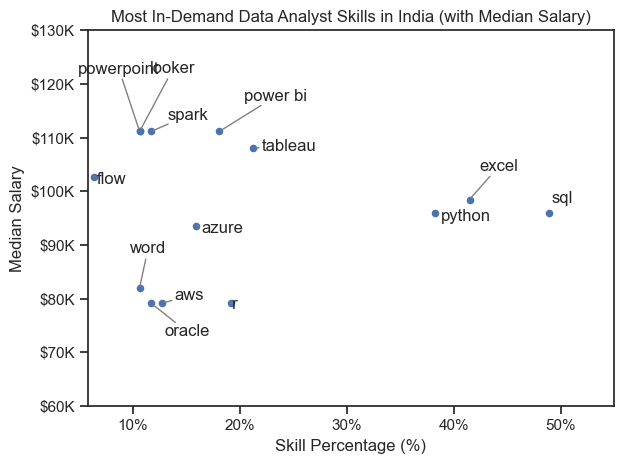

In [81]:
from adjustText import adjust_text


df_DA_skills_tech.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))   

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.title('Most In-Demand Data Analyst Skills in India (with Median Salary)')
plt.xlabel('Skill Percentage (%)')   
plt.ylabel('Median Salary')
plt.xlim(5.8, 55)
plt.ylim(60000, 130000)
plt.tight_layout()

plt.show()


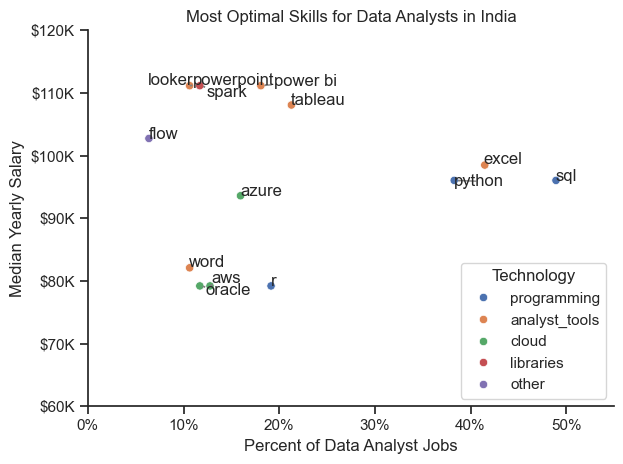

In [86]:
# Use the merged dataframe with technology info, filtered for high-demand skills
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] >= skill_percent]

sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_DA_skills_tech_high_demand['skill_percent'].iloc[i], df_DA_skills_tech_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.xlim(0, 55)
plt.ylim(60000, 120000)
plt.tight_layout()
plt.show()
